Clean the provided sales_data.csv datset and analyze sales performance across regions, products, customer segments, and time. Produce at least 4 visualizations, answer the business questions below and submit a cleaned CSV, a jupyter notebook with code + comments and a one page summary with top 5 insights and recommendations.

Business questions to answer

Which region generated the highest total revenue?

Which products are top revenue contributors?

What is the monthly sales trend -- any seasonally?

Does discount level affect revenue/quality sold?

Which payment and shipping methods are most used nd most profitable?


#### Quick Setup

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pd.options.display.max_columns = 60
pd.options.display.max_rows = 20

plt.rcParams['figure.figsize'] = (10,6)

#### Load Data

In [2]:
df = pd.read_csv('sales_data.csv')
print('Shape of df', df.shape)
display(df.head())

Shape of df (2580, 13)


,Order_ID,Date,Customer_ID,Product,Category,Quantity,Price,Discount,Region,Payment_Method,Customer_Segment,Shipping_Method,Revenue
0,1,2022-04-13,CUST1759,Smartwatch,Electronics,1.0,745.0,0.15,East,Online Wallet,Consumer,Same Day,633.25
1,2,2023-03-12,CUST1776,Camera,Accessories,17.0,1066.0,0.00,West,Credit Card,Corporate,First Class,18122.00
2,3,2022-09-28,CUST1726,Headphones,Accessories,4.0,379.0,0.15,South,Debit Card,Home Office,Same Day,1288.60
3,4,2022-04-17,CUST1200,Tablet,Office Supplies,5.0,709.0,0.10,East,Cash,Small Business,Same Day,3190.50
4,5,2022-03-13,CUST1079,Tablet,Accessories,7.0,1690.0,0.05,North,Online Wallet,Consumer,First Class,11238.50


#### Quick structure summary (EDA Start)

In [3]:
df.info() #dtype and non-null values count

display(df.describe(include = 'all').transpose())

print('Missing values per column\n',df.isnull().sum())

print('Number of duplicate rows', df.duplicated().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2580 entries, 0 to 2579
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Order_ID          2580 non-null   int64  
 1   Date              2580 non-null   object 
 2   Customer_ID       2580 non-null   object 
 3   Product           2528 non-null   object 
 4   Category          2580 non-null   object 
 5   Quantity          2528 non-null   float64
 6   Price             2527 non-null   float64
 7   Discount          2580 non-null   float64
 8   Region            2580 non-null   object 
 9   Payment_Method    2527 non-null   object 
 10  Customer_Segment  2580 non-null   object 
 11  Shipping_Method   2580 non-null   object 
 12  Revenue           2475 non-null   float64
dtypes: float64(4), int64(1), object(8)
memory usage: 262.2+ KB


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Order_ID,2580.0,NaN,NaN,NaN,1249.60155,720.858175,1.0,626.75,1251.5,1872.25,2500.0
Date,2580,695,2022-04-09,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Customer_ID,2580,750,CUST1154,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Product,2528,7,Printer,389,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Category,2580,3,Accessories,908,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Quantity,2528.0,NaN,NaN,NaN,10.085047,5.531316,1.0,5.0,10.0,15.0,19.0
Price,2527.0,NaN,NaN,NaN,1032.014246,552.643569,50.0,563.5,1044.0,1512.0,1999.0
Discount,2580.0,NaN,NaN,NaN,0.100136,0.070731,0.0,0.05,0.1,0.15,0.2
Region,2580,4,East,663,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Payment_Method,2527,5,Debit Card,525,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Missing values per column
 Order_ID              0
Date                  0
Customer_ID           0
Product              52
Category              0
Quantity             52
Price                53
Discount              0
Region                0
Payment_Method       53
Customer_Segment      0
Shipping_Method       0
Revenue             105
dtype: int64
Number of duplicate rows 80


Why

info:- reveals wrong types(eg.date as object).

isnull().sum():- tells where cleaning is needed.

duplicated():- show the duplicates

#### convert date to datetime and sort by date

In [4]:
df['Date'] = pd.to_datetime(df['Date'], errors= 'coerce') #bad parse -> NaT

print('Date parsing NaT count: ', df['Date'].isna().head())

# Optional inspects bad rows

display(df[df['Date'].isna()].head())

# For analysis drop rows without a valid date

df = df.dropna(subset= ['Date']).copy()
df = df.sort_values('Date').reset_index(drop= True)

Date parsing NaT count:  0    False
1    False
2    False
3    False
4    False
Name: Date, dtype: bool


,Order_ID,Date,Customer_ID,Product,Category,Quantity,Price,Discount,Region,Payment_Method,Customer_Segment,Shipping_Method,Revenue


#### Why

Time series operations require true datetime

errors = 'coerce' helps catch malformed dates

#### Ensure numeric types for Quantity, Price, Discount

In [5]:
df['Quantity'] = pd.to_numeric(df['Quantity'],errors='coerce')

df['Price'] = pd.to_numeric(df['Price'],errors='coerce')

df['Discount'] = pd.to_numeric(df['Discount'],errors='coerce')

print(df[['Quantity', 'Price', 'Discount']].dtypes)

print('Nulls after coercion:\n',df[['Quantity', 'Price', 'Discount']].isnull().sum())

Quantity    float64
Price       float64
Discount    float64
dtype: object
Nulls after coercion:
 Quantity    52
Price       53
Discount     0
dtype: int64


#### Handling Missing values

General Strategy:

1. Drop rows missing essential categorical info like product

2. For Quantity: fill with median

3. For price: fill with median price

4. For payment_method = fill unknown

In [6]:
#1. Drop rows with missing product (can't assign revenue)

df = df.dropna(subset = ['Product'])

#2. Fill Quantity with median

qty = int(df['Quantity'].median())

df['Quantity'].fillna(qty, inplace= True)

#3. Fill price with Product Level median

df['Price'] = df['Price'].fillna(df.groupby('Product')['Price'].transform('median'))

df['Price'].fillna(df['Price'].median(), inplace= True)

#4. Fill Payment_method = unknown

df['Payment_Method'].fillna('Unknown', inplace= True)

# Check

print('Missing after inputation', df.isnull().sum())




Missing after inputation Order_ID              0
Date                  0
Customer_ID           0
Product               0
Category              0
Quantity              0
Price                 0
Discount              0
Region                0
Payment_Method        0
Customer_Segment      0
Shipping_Method       0
Revenue             103
dtype: int64


C:\Users\sarth\AppData\Local\Temp\ipykernel_18232\1137988300.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Quantity'].fillna(qty, inplace= True)
C:\Users\sarth\AppData\Local\Temp\ipykernel_18232\1137988300.py:15: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, 

In [7]:
#### Remove duplicates

print('Duplicate rows', df.duplicated().sum())

df = df.drop_duplicates().reset_index(drop= True)

print('Duplicate rows', df.duplicated().sum())

Duplicate rows 78
Duplicate rows 0


In [8]:
dup_ordid = df[df.duplicated(subset=["Order_ID"],keep= False)]

print('Duplicate Order Id rows', len(dup_ordid), display(dup_ordid.head()))

,Order_ID,Date,Customer_ID,Product,Category,Quantity,Price,Discount,Region,Payment_Method,Customer_Segment,Shipping_Method,Revenue


Duplicate Order Id rows 0 None


# ReCalcute / Ensure revenue is correct

In [9]:
df['Revenue'] = df['Quantity'] * df['Price'] * (1 - df['Discount'])

display(df['Revenue'].describe())

count     2450.000000
mean      9382.244643
std       7657.603868
min         52.250000
25%       3108.400000
50%       7284.450000
75%      14288.137500
max      37278.000000
Name: Revenue, dtype: float64

In [10]:
df['Year'] = df['Date'].dt.year

df['Month'] = df['Date'].dt.month

df['MonthName'] = df['Date'].dt.strftime('%b')

df['YearMonth'] = df['Date'].dt.to_period('M').astype(str)


In [11]:
print(df.head())

   Order_ID       Date Customer_ID     Product         Category  Quantity  \
0      1138 2022-01-01    CUST1327     Printer  Office Supplies      17.0   
1       756 2022-01-01    CUST1722  Smartwatch      Electronics       5.0   
2      2033 2022-01-01    CUST1054      Camera      Electronics      10.0   
3       649 2022-01-01    CUST1284      Tablet      Electronics      18.0   
4       980 2022-01-01    CUST1124  Headphones      Accessories      12.0   

    Price  Discount Region Payment_Method Customer_Segment Shipping_Method  \
0   853.0      0.20  South     Debit Card      Home Office  Standard Class   
1   110.0      0.05  North     Debit Card        Corporate     First Class   
2  1540.0      0.10  South           Cash         Consumer    Second Class   
3  1512.0      0.00  South           Cash        Corporate  Standard Class   
4  1721.0      0.20  South     Debit Card   Small Business     First Class   

   Revenue  Year  Month MonthName YearMonth  
0  11600.8  2022      

#### Outlier

In [12]:
print('Quant <= 0:', (df['Quantity']<=0).sum())

print('Price <= 0:', (df['Price']<=0).sum())

Quant <= 0: 0
Price <= 0: 0


#### Answer business questions with groupby and pivot

In [13]:
total_transactions = len(df)

total_revenue = df['Revenue'].sum()

avg_order_value = df['Revenue'].mean()

print('Total Transaction', total_transactions)

print('Total Revenue', total_revenue)

print('Average Order', round(avg_order_value,2))

Total Transaction 2450
Total Revenue 22986499.375
Average Order 9382.24


#### Revenue by region

In [14]:
rev_by_region = df.groupby('Region')['Revenue'].sum().sort_values(ascending= False)
display(rev_by_region)

Region
East     5906905.300
North    5895955.800
South    5762141.950
West     5421496.325
Name: Revenue, dtype: float64

#### Interpretetion:- Region with highest value - East

In [15]:
rev_by_region = (rev_by_region/total_revenue*100).round(2)
display(rev_by_region)

Region
East     25.70
North    25.65
South    25.07
West     23.59
Name: Revenue, dtype: float64

#### Top products by revenue

In [16]:
top_product = df.groupby('Product')['Revenue'].sum().sort_values(ascending=False)

display(top_product.head(10))

Product
Printer       3902730.950
Headphones    3410419.650
Camera        3286806.525
Smartwatch    3217151.350
Laptop        3196657.700
Tablet        3144722.700
Smartphone    2828010.500
Name: Revenue, dtype: float64

In [17]:
prod_sum = df.groupby('Product').agg(Total_Revenue = ('Revenue', 'sum'), Total_units = ('Quantity','sum'), Avg_price = ('Price','mean'))
display(prod_sum.head())

,Total_Revenue,Total_units,Avg_price
Product,,,
Camera,3286806.525,3723.0,979.679063
Headphones,3410419.650,3591.0,1059.781513
Laptop,3196657.700,3343.0,1072.418462
Printer,3902730.950,3936.0,1075.294430
Smartphone,2828010.500,3113.0,1006.032544


#### What is the monthly sales trend - any seasonality?

In [18]:
df_ts = df.set_index('Date').sort_index()

monthly_rev = df_ts['Revenue'].resample('ME').sum()

display(monthly_rev.head(10))

Date
2022-01-31    1148471.100
2022-02-28     907185.400
2022-03-31     937657.225
2022-04-30     978358.500
2022-05-31     973876.950
2022-06-30     994330.300
2022-07-31     804874.150
2022-08-31    1185448.125
2022-09-30     898735.800
2022-10-31     964322.450
Freq: ME, Name: Revenue, dtype: float64

In [20]:
dis_summary = df.groupby('Discount').agg(Total_rev = ('Revenue', 'sum'), avg_quant = ('Quantity','mean'), orders = ('Order_ID','count')).sort_index()

display(dis_summary)


,Total_rev,avg_quant,orders
Discount,,,
0.00,5065124.000,10.262156,473
0.05,4703192.075,9.566406,512
0.10,4328991.900,10.289130,460
0.15,4826976.600,10.406551,519
0.20,4062214.800,9.907407,486


Interpritation:- If higher discount lead to higher quantity/orders and if net revenue increases or decreases

Which shipping method are most used and most profitable?

In [22]:
rev_pay = df.groupby('Payment_Method')['Revenue'].sum().sort_values(ascending=False)

rev_shipp = df.groupby('Shipping_Method')['Revenue'].sum().sort_values(ascending=False)

display(rev_pay,rev_shipp)

Payment_Method
Bank Transfer    4652229.750
Credit Card      4596450.050
Cash             4565282.475
Debit Card       4460087.125
Online Wallet    4219027.425
Unknown           493422.550
Name: Revenue, dtype: float64

Shipping_Method
Same Day          6060139.675
First Class       5885464.900
Second Class      5766082.200
Standard Class    5274812.600
Name: Revenue, dtype: float64

In [24]:
seg_summ = df.groupby('Customer_Segment').agg(Total_Rev = ('Revenue','sum'),avg_ord_val = ('Revenue','mean'), orders=('Order_ID', 'count'))
display(seg_summ)

,Total_Rev,avg_ord_val,orders
Customer_Segment,,,
Consumer,5824908.850,9533.402373,611
Corporate,5873325.950,9091.835836,646
Home Office,5488268.750,9381.655983,585
Small Business,5799995.825,9539.466817,608


#### Monthly Revenue Trend - Line plot

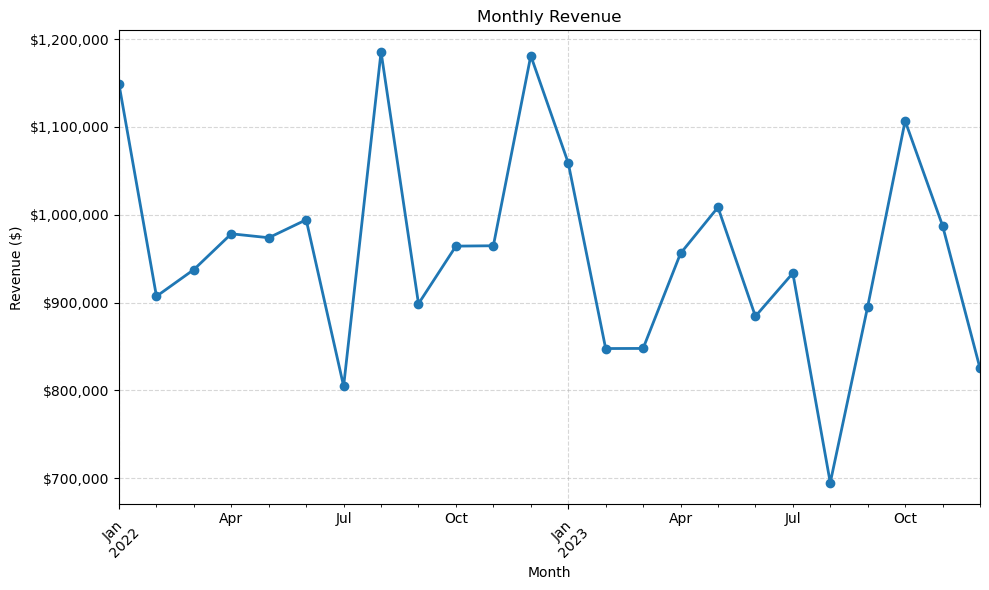

In [30]:
import matplotlib.ticker as mtick

monthly_rev.plot(kind='line', marker = 'o', linewidth= 2,title = 'Monthly Revenue')

plt.xlabel('Month')
plt.ylabel('Revenue ($)')
plt.grid(True, linestyle= '--', alpha= 0.5)

#format

plt.gca().yaxis.set_major_formatter(mtick.StrMethodFormatter('${x:,.0F}'))

plt.xticks(rotation = 45)
plt.tight_layout()

plt.show()

#### Revenue By Region

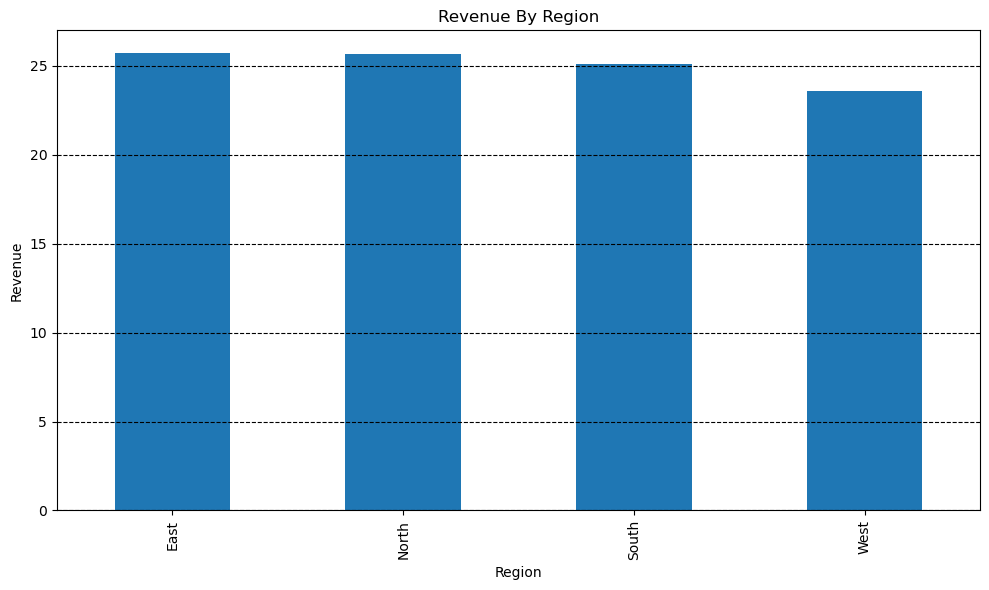

In [ ]:
rev_by_region.plot(kind = 'bar', title = 'Revenue By Region')

plt.ylabel('Revenue')

plt.grid(axis = 'y', linestyle = '--', color = 'Black')

plt.tight_layout()
plt.show()

#### Top products Horizontal Bar

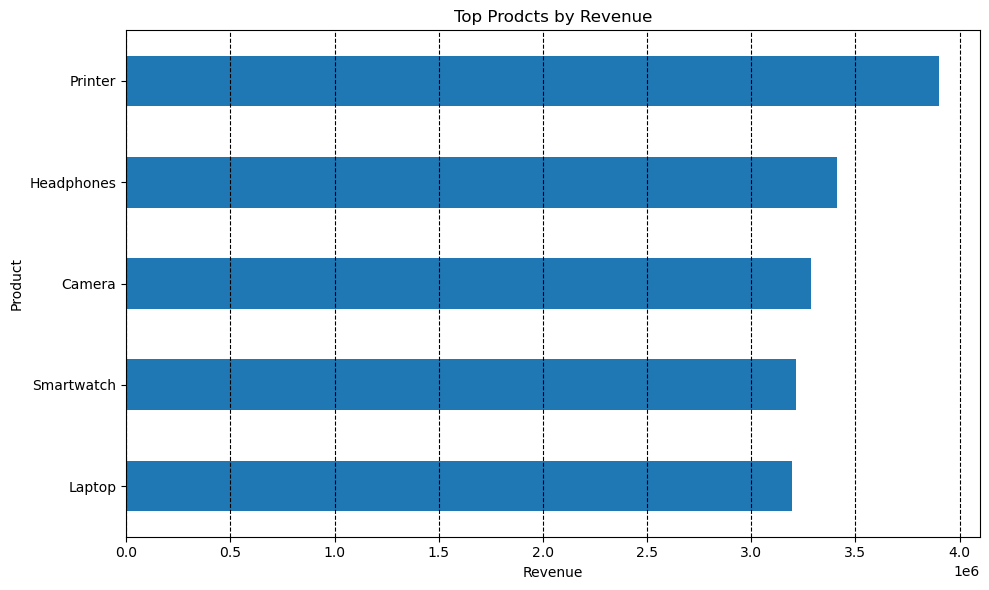

In [34]:
top_product.head().sort_values().plot(kind= 'barh', title = 'Top Prodcts by Revenue')

plt.xlabel('Revenue')
plt.grid(axis = 'x', linestyle = '--', color = 'Black')
plt.tight_layout()
plt.show()

Discount vs Quantity box plot

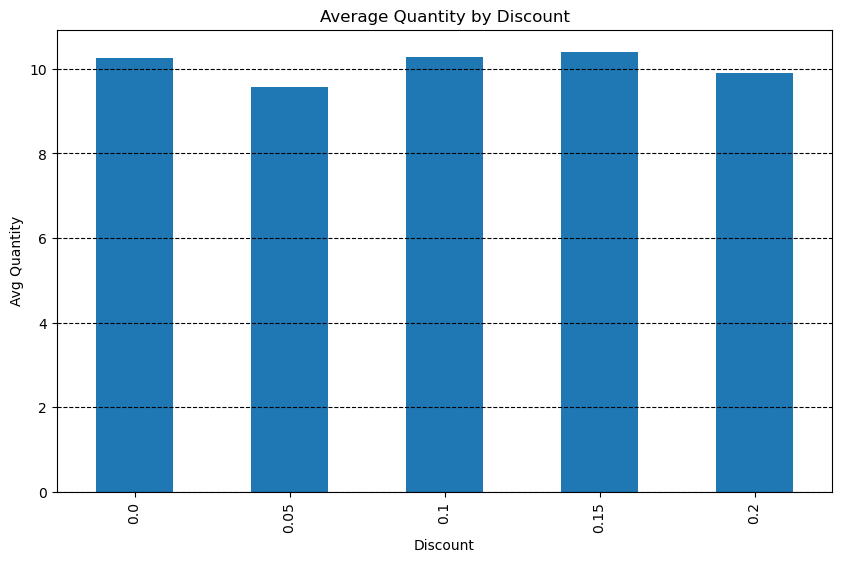

In [36]:
df.groupby('Discount')['Quantity'].mean().plot(kind='bar',title= 'Average Quantity by Discount')

plt.ylabel('Avg Quantity')
plt.grid(axis = 'y', linestyle = '--', color = 'Black')
plt.show()

### Payment Method Preference

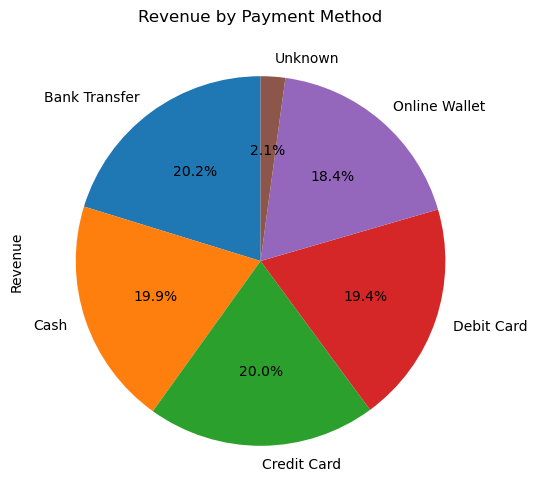

In [39]:
payment_rev = df.groupby('Payment_Method')['Revenue'].sum()

payment_rev.plot(kind = 'pie', autopct= '%1.1f%%', startangle = 90,title= 'Revenue by Payment Method')

plt.show()

#### Shippin Method analysis

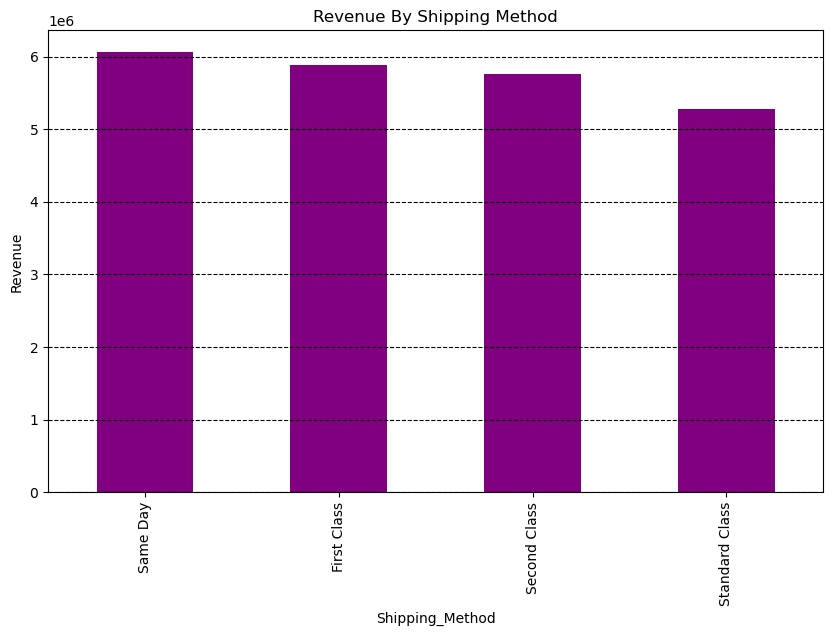

In [41]:
shipp_rev = df.groupby('Shipping_Method')['Revenue'].sum().sort_values(ascending = False)

shipp_rev.plot(kind = 'bar', color = 'purple', title = 'Revenue By Shipping Method')

plt.ylabel('Revenue')
plt.grid(axis = 'y', linestyle = '--', color = 'Black')

plt.show()

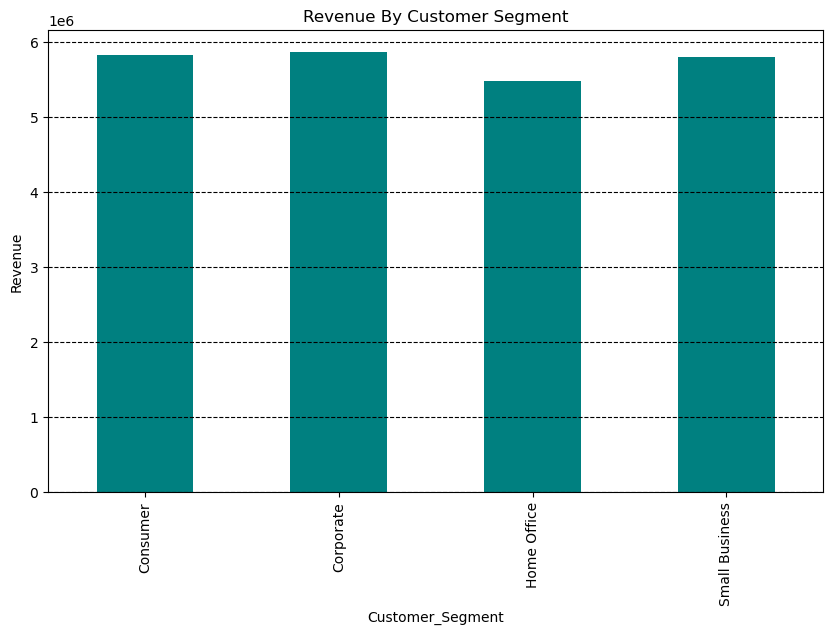

In [42]:
seg_summ = df.groupby('Customer_Segment')['Revenue'].sum()

seg_summ.plot(kind = 'bar', color = 'teal', title ='Revenue By Customer Segment')

plt.ylabel('Revenue')
plt.grid(axis = 'y', linestyle = '--', color = 'Black')

plt.show()

### Final summary 

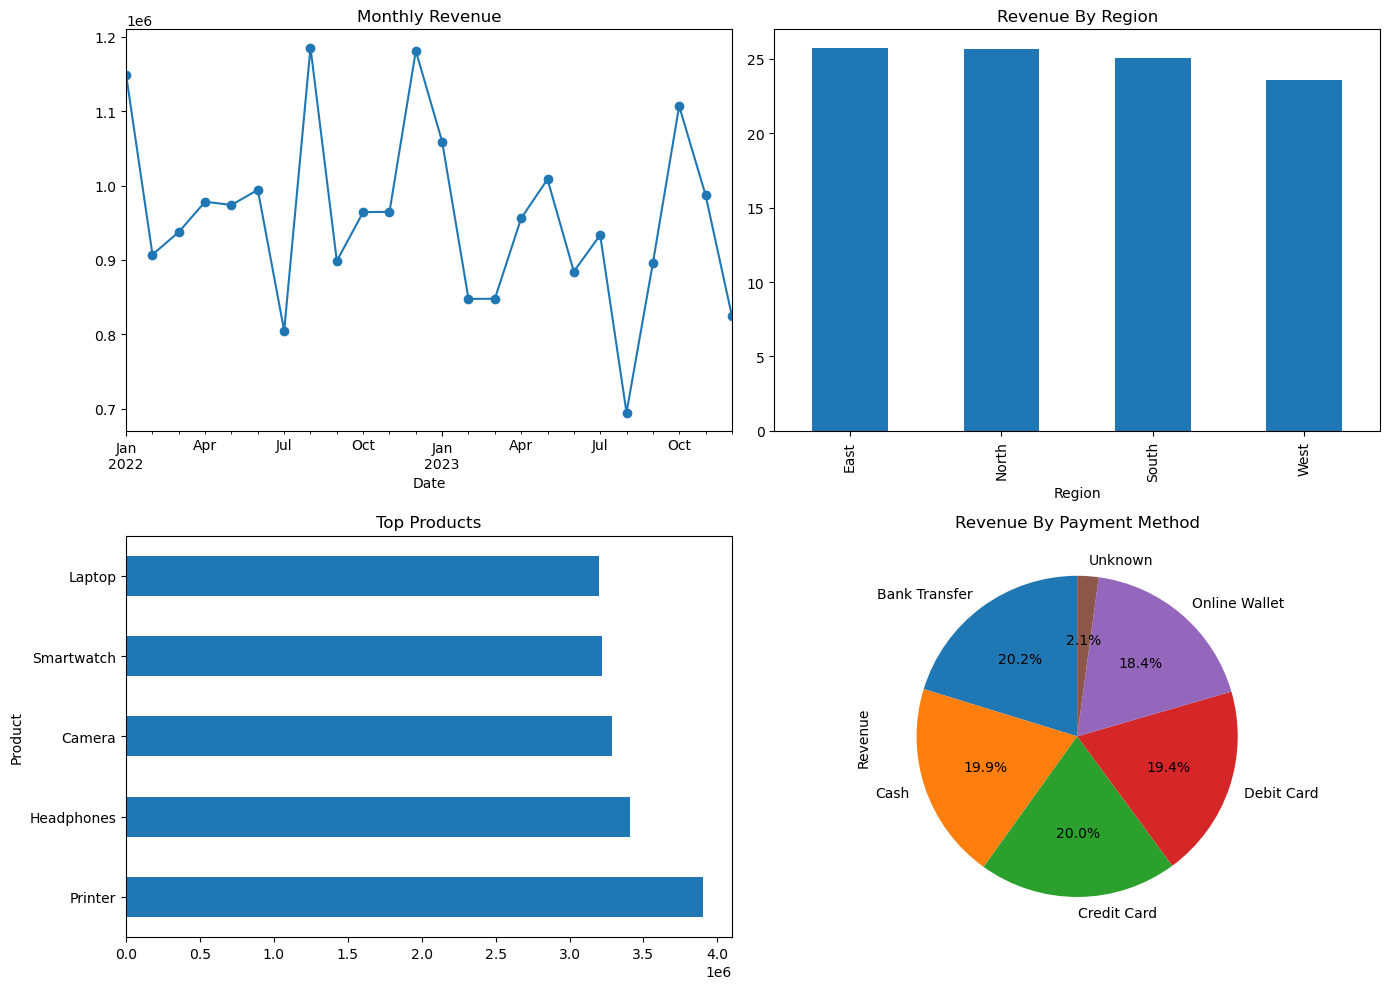

In [46]:
fig, axis = plt.subplots(2,2,figsize= (14,10))

monthly_rev.plot(ax = axis[0,0],title='Monthly Revenue', marker = 'o')
rev_by_region.plot(kind = 'bar', ax = axis[0,1], title = 'Revenue By Region')

top_product.head(5).plot(kind = 'barh', ax = axis[1,0], title = 'Top Products')

payment_rev.plot(kind = 'pie', ax = axis[1,1], autopct = '%1.1f%%', startangle = 90, title= 'Revenue By Payment Method')
plt.tight_layout()
plt.show()